In [1]:
import numpy as np
from iminuit import Minuit

import clapy

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
from math import sqrt,log
def fitfunc( t, Tc, r, GF):
    if t<(Tc-Tc*r):
        res = GF/Tc*(t+Tc*r)
    else:
        res =  GF
    return res 

def mypdfln( x,  mu,  std):
    #cpdef means generate both c function and python function
    norm = (sqrt(2*np.pi*std*std))
    ret = (-1*(x-mu)*(x-mu)/(2.*std*std))-log(norm)
    return ret




class Nowakowski_LH:  
    def __init__(self,data,t):
        self.data = data
        self.t = t
        self.ndata = len(data)
    
    def compute(self,  Tc, r, GF, s):
        #this line is a cast not a copy. Let cython knows mydata will spit out double
        mydata = self.data
        myt = self.t
        loglh = 0.
        lmu = 0.
        ler = 0.
        for i in range(self.ndata):
            lmu = fitfunc(myt[i],Tc,r,GF)
            loglh -= mypdfln(mydata[i],lmu,s)
        return loglh



In [3]:
#gen data need clasim

import clasim
dargs = {
        'samples': 5,
        'nCells': 100,
        'mCells': 100,
        'GF': 0.95,
        'G1': 0.5,
        'S': 0.3,
        'G2M': 0.2,
        'sCells' : 0.3,
        'sSamples' : 0.2
}
timep = [0.1,0.4,0.5,0.8,1.0,1.2]
ncells = dargs['nCells']
labeld_cells,times = np.array(clasim.run(seed=int(np.random.rand()*1000),mode=1,times=timep,**dargs)) 



In [9]:
times  = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 
                0.4, 0.4, 0.4, 0.4, 0.4, 
                0.5, 0.5, 0.5, 0.5, 0.5,
                0.8, 0.8, 0.8, 0.8, 0.8, 
                1.2, 1.2, 1.2, 1.2, 1.2]) 
ncells = 100
labeld_cells = np.array([30., 49., 34., 43., 36.,
                      77., 74., 70., 56., 68.,
                      86., 84., 76., 86., 89.,
                      82., 87., 96., 91., 95.,
                      95., 94., 95., 93., 91.])

In [4]:
clapy.web_fit(times,labeld_cells,ncells*np.ones_like(times),'.','name')

{'Tc': {'value': 1.1999999999778397, '2sigma': 0.08710335304202532},
 'r': {'value': 0.30719270991447, '2sigma': 0.035053997551938665},
 'GF': {'value': 0.9813653429745761, '2sigma': 0.01694111387967978},
 'sigma_cell': {'value': 0.5999999814012315, '2sigma': 0.8531304322038775},
 'sigma_sample': {'value': 0.08328860412209756, '2sigma': 0.10760804191452458}}

FCN = -51.729386622481435 
 TOTAL NCALL = 187 
 NCALLS = 187 
 
 
 EDM = 1.0303330980018625e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,Tc,1.11697,0.0881663,,,1e-05,2,No
1,r,0.359703,0.0265147,,,1e-05,1,No
2,GF,0.93598,0.0111349,,,0,1,No
3,s,0.0431456,0.00556992,,,0.0001,1,No


FCN = 78.84369671152821 
 TOTAL NCALL = 191 
 NCALLS = 191 
 
 
 EDM = 7.740576428584954e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,Tc,1.22955,0.108737,,,1e-05,2,No
1,r,0.344579,0.0327794,,,1e-05,1,No
2,GF,0.962795,0.0149701,,,0,1,No
3,sigma_cell,0.387857,0.14516,,,1e-05,1,No
4,sigma_sample,0.0758455,0.066161,,,1e-05,1,No


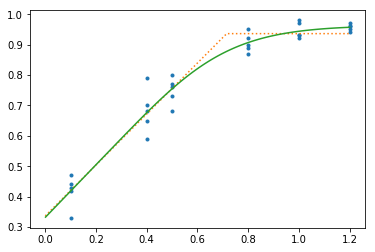

In [5]:

if np.size(ncells) !=  np.size(labeld_cells):
    ncells = np.ones_like(labeld_cells)*ncells

#fit nowakowski
lh = Nowakowski_LH(labeld_cells/ncells,times)
mi_old = Minuit(lh.compute, Tc=1.0, r=0.3,GF=1,s=0.1,\
                      error_r=0.1,error_GF=0.1,error_Tc=0.1,error_s=0.1,\
           limit_Tc=(0.00001,2), limit_r=(0.00001,1),limit_GF=(0,1),limit_s=(0.0001,1),\
           errordef=0.5,print_level=2)
mi_old.migrad()
res = mi_old.values
args = {
        'GF': res['GF'],
        'G1': res['Tc']*((1-res['r'])*0.5),
        'S': res['Tc']*res['r'],
        'G2M': res['Tc']*((1-res['r'])*0.5)
}

lhn = clapy.asym_lh(labeld_cells,times,ncells)
mi = Minuit(lhn.compute, Tc=1.0, r=0.3,GF=1.0,fix_GF=False,sigma_sample=0.25,sigma_cell=0.3, \
           error_Tc=0.1,error_r=0.1,error_GF=0.1,error_sigma_sample=0.1,error_sigma_cell=0.1,\
           limit_Tc=(0.00001,2), limit_r=(0.00001,1),limit_GF=(0,1),limit_sigma_sample=(0.00001,1),limit_sigma_cell=(0.00001,1),\
           errordef=0.5,print_level=2)
mi.migrad();

fit = dict()
for i in  mi.values:
    fit.update( {i : {'value' : mi.values[i], '2sigma' : 2*mi.errors[i]}})


plt.plot(times,labeld_cells/ncells,'.')

ttt = np.linspace(0,times.max(),1000)
plt.plot(ttt,clapy.cla_det_model(ttt,mode=1,**args),':',label="now. fit")


ttt2 = np.linspace(0.001,times.max(),100)

d = clapy.dist()
prob = np.zeros(len(ttt2))
for t_n,t in enumerate(ttt2):
    prob[t_n] = d.pmf_mean(np.mean(ncells),\
                           fit['Tc']['value'],fit['r']['value'],fit['GF']['value'],\
                           fit['sigma_cell']['value'],fit['sigma_sample']['value'],t)\
                / np.mean(ncells)

plt.plot(ttt2,prob,label='probabilistic model')

In [6]:

import scipy.stats as st
from scipy import integrate
from scipy import special
def log_params( mu, sigma):
    """ A transformation of paramteres such that mu and sigma are the
        mean and variance of the log-normal distribution and not of
        the underlying normal distribution.
    """
    s2 = np.log(1.0 + sigma**2/mu**2)
    m = np.log(mu) - 0.5 * s2
    s = np.sqrt(s2)
    return m, s



def A(Tc,a,t,fg1,m,s):
    return st.lognorm.cdf( (t-Tc*(1-a))/(fg1) ,s=s,scale=np.exp(m))*st.lognorm.pdf(Tc,s=s,scale=np.exp(m))

def IntA(a,t,fg1,m,s):
    if isinstance(a, float):   
        return integrate.fixed_quad(A,0.0001,t/(1-a),args=(a,t,fg1,m,s),n=1000)[0]
    else:
        return [integrate.fixed_quad(A,0.0001,t/(1-ai),args=(ai,t,fg1,m,s),n=1000)[0] for ai in a]

def p(t,fg1,fs,mu,si):
    m,s = log_params( mu, si)
    A = fs+0.5*np.exp(-m)*(np.exp(s*s/2.0)*t+np.exp(s*s/2.0)*t*special.erf((m-s*s+np.log(fg1)-np.log(t))/(np.sqrt(2)*s))+\
                           np.exp(m)*fg1*special.erfc( (m+np.log(fg1)-np.log(t)) / (np.sqrt(2)*s)))
    B = integrate.fixed_quad(IntA,fg1+fs,0.9999,args=(t,fg1,m,s),n=200)[0]
    return A + B


In [7]:
np.linspace(0.1,0.5,3)

array([0.1, 0.3, 0.5])

In [44]:
tt = np.linspace(0.001,2,200)
dnew  = []
dold  = []
index = []
d = clapy.dist()
for s in np.linspace(0.01,1,10):
    for fs in np.linspace(0.1,0.5,3):
        for fg1 in np.linspace(0.1,0.9,10):
            if (fg1+fs>1):
                continue
            pt = np.array([p(t,fg1,fs,1,s) for t in tt])
            pold_t = []
            for t in tt:
                d.t = t
                pold_t.append(d.logn(s,1,fs))
            pold_t = np.array(pold_t)
            index.append((s,fs,fg1))
            dnew.append(pt)
            dold.append(pold_t)
import pandas as pd
dnew = pd.DataFrame(dnew,columns=tt,index=pd.MultiIndex.from_tuples(index,names=['sigma','fs','fg1']))
dold = pd.DataFrame(dold,columns=tt,index=pd.MultiIndex.from_tuples(index,names=['sigma','fs','fg1']))

In [57]:
(dnew - dold).max(axis=1).argmax()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


(0.45, 0.1, 0.2777777777777778)

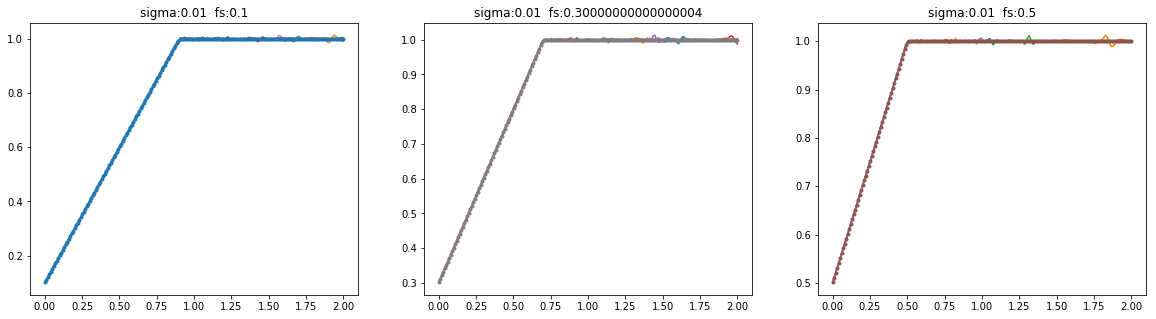

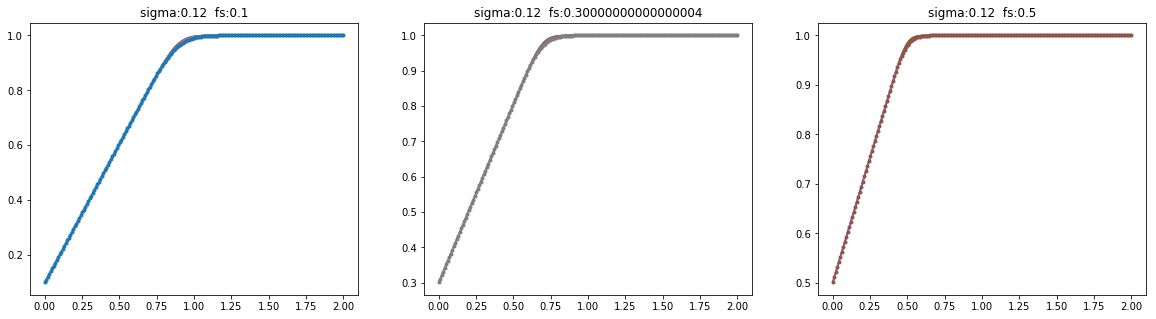

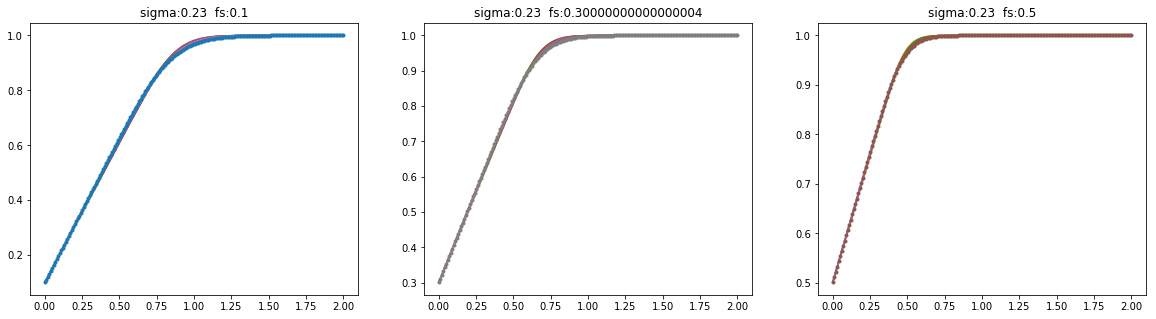

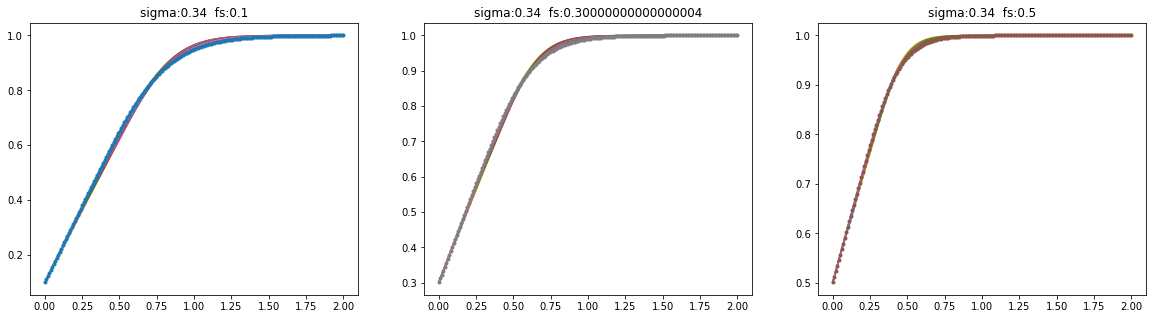

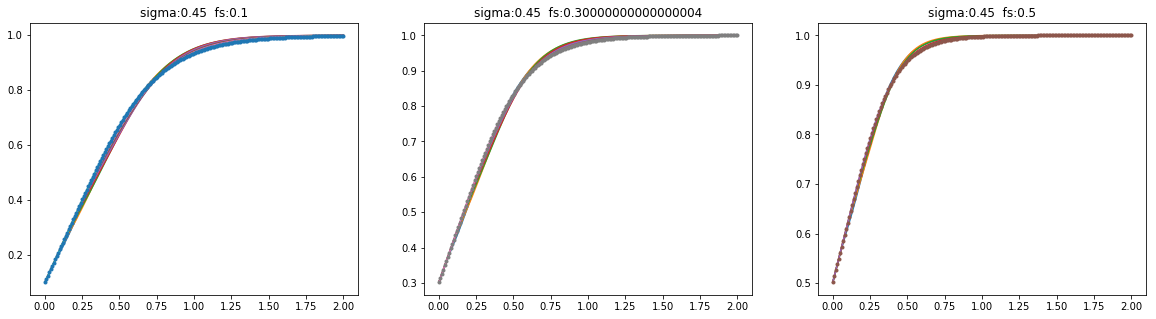

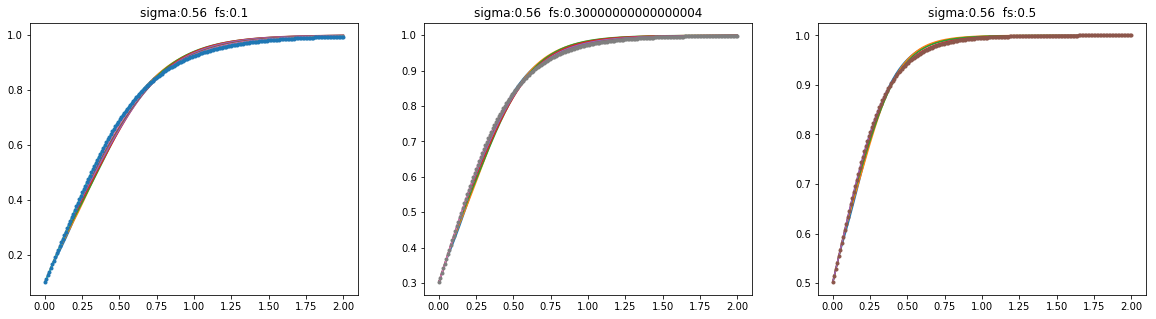

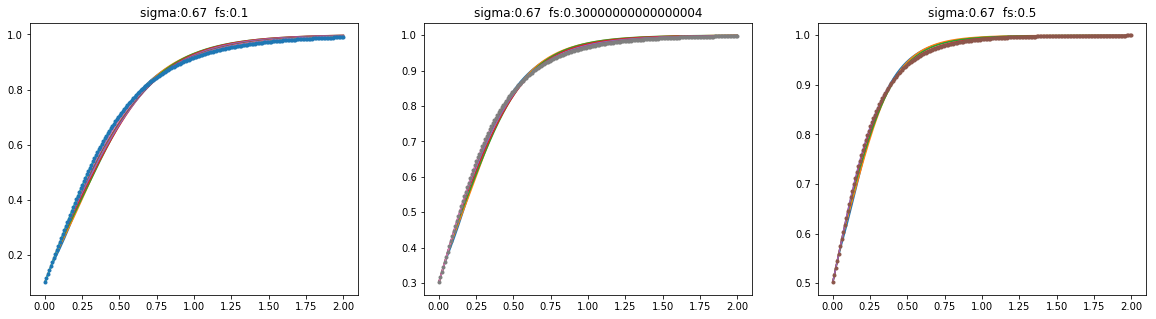

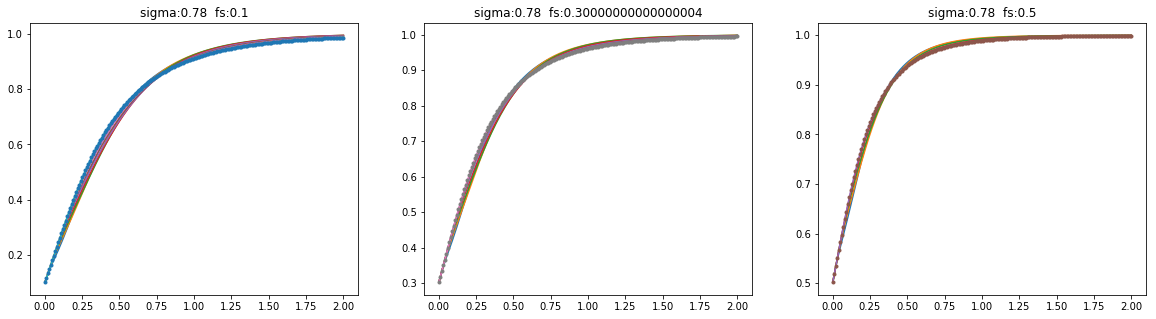

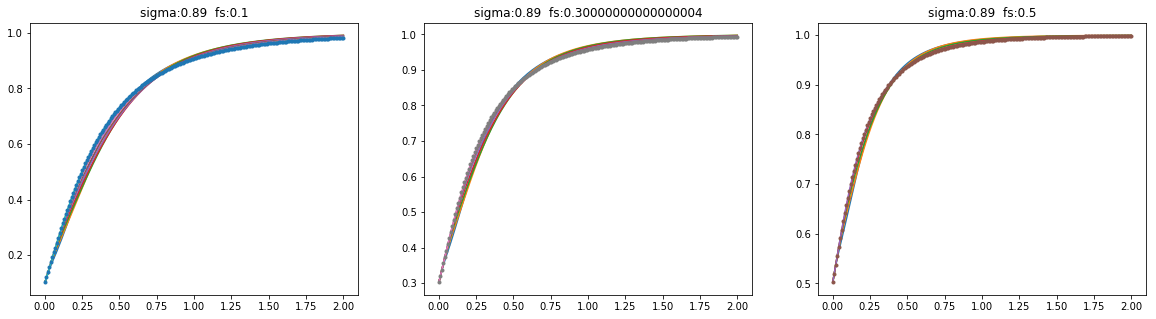

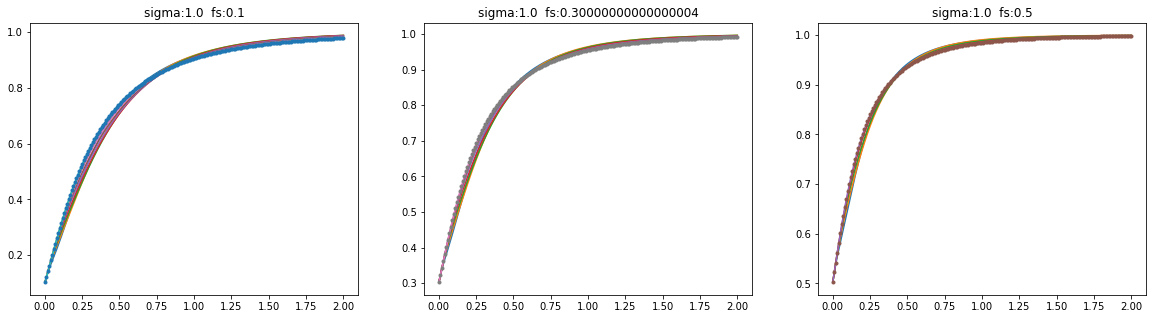

In [72]:
for s in np.linspace(0.01,1,10):
    f = plt.figure(figsize=(20,5))
    ax = [plt.subplot(131),plt.subplot(132),plt.subplot(133)]
    for n,fs in enumerate(np.linspace(0.1,0.5,3)): 
    
        ax[n].set_title('sigma:'+str(s)+'  fs:'+str(fs))
        for fg1 in np.linspace(0.1,0.9,10): 
            try:
                ax[n].plot(dnew.loc[(s, fs, fg1)])
            except:
                pass
        ax[n].plot(dold.loc[(s, fs, 0.2777777777777778)],'.')
    

In [31]:
tt = np.linspace(0.001,2,100)
d = clapy.dist()
pt = np.array([p(t,fg1,fs,1,s) for t in tt])
pold_t = []
for t in tt:
    d.t = t
    pold_t.append(d.logn(fs,1,s))
pold_t = np.array(pold_t)
pt


/home/julian/brdu/git_final/clapy/clapy.py:149: RuntimeWarning: divide by zero encountered in double_scalars
  la = np.log(self.t/(1-r))


array([0.902     , 0.94237942, 0.98263936, 1.02242553, 1.06131225,
       1.09894665, 1.13508357, 1.16957534, 1.20235035, 1.23339236,
       1.26272361, 1.29039209, 1.31646218, 1.34100796, 1.36410853,
       1.38584471, 1.40629686, 1.42554335, 1.44365962, 1.46071763,
       1.47678552, 1.49192749, 1.50620378, 1.51967077, 1.53238111,
       1.54438388, 1.55572479, 1.56644639, 1.57658823, 1.5861871 ,
       1.5952772 , 1.60389034, 1.61205608, 1.61980193, 1.62715347,
       1.63413454, 1.6407673 , 1.64707243, 1.65306916, 1.65877548,
       1.66420813, 1.66938275, 1.67431396, 1.67901542, 1.68349989,
       1.68777933, 1.69186491, 1.69576713, 1.69949581, 1.70306016,
       1.70646881, 1.7097299 , 1.71285105, 1.71583942, 1.71870175,
       1.72144439, 1.7240733 , 1.72659412, 1.72901215, 1.73133238,
       1.73355953, 1.73569806, 1.73775215, 1.7397258 , 1.74162275,
       1.74344655, 1.74520056, 1.74688796, 1.74851177, 1.75007483,
       1.75157985, 1.7530294 , 1.7544259 , 1.75577166, 1.75706

beta distribution!!!

In [28]:
tt = np.linspace(0.001,2,100)
[p(0.4,0.5,0.3,1,0.2) for t in tt]

[0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791838885,
 0.7133787791

In [29]:
len(tt)

100